Conversion from deconvolved signal to origin  
Author: Javier Gamero Muñoz

# General libraries

In [1]:
import os 
import sys 

# path to python main folder in this project
libraries = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
sys.path.append(libraries) 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from decompose import greedyDecomposition 

# Load data

In [2]:
PATH = os.path.abspath(os.path.join(os.getcwd(), (os.pardir+'/')*3)) # main path
PATH

'/Users/javigamero/MyMac/DS_Master/TFM'

## Ideal data (origin)

In [3]:
t_path = os.path.join(PATH, 'data_preproc/LightSignal_t.csv')
t_id = pd.read_csv(t_path, sep=';', header=None) # t[0] is nonsensen, remove it
t_id.set_index(0, inplace=True)

t_id = np.array(t_id).reshape(-1).astype(np.int32)
print(t_id.shape)

(1000,)


In [4]:
t0 = 150 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx = np.where(t_id>t0)[0]
t_idx.shape

t1 = 500 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx1 = np.where(t_id>t1)[0]
t_idx1.shape

(950,)

In [5]:
id_path = os.path.join(PATH, 'data_preproc/LightSignal_total.csv')
signals_id = pd.read_csv(id_path, sep=';', header=None)
signals_id.set_index(0, inplace=True)
print('Ideal signals df shape: ', signals_id.shape)

Ideal signals df shape:  (9325, 1000)


In [6]:
signals_id.head()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,0,0,0,18,1024,1755,1309,809,552,369,...,0,0,0,1,0,0,0,0,0,1
0_4,0,0,0,17,537,1262,1065,678,436,299,...,0,0,0,0,0,0,0,0,0,0
0_6,0,0,0,13,740,1238,840,507,300,206,...,0,0,0,0,0,0,0,1,0,1
0_8,0,0,0,97,962,1086,627,338,258,177,...,0,0,0,0,0,0,0,0,0,0
0_9,0,0,0,18,712,1509,957,523,316,202,...,0,0,0,0,0,0,0,0,0,0


## Deconvolved data reduced

In [7]:
data_path = os.path.join(os.path.join(PATH, 'data_preproc'), 'DeconvolvedSignal_us.csv')
signals_dec_us = pd.read_csv(data_path, sep=';', header=None, index_col=0)

print(signals_dec_us.shape)
signals_dec_us.head()

(9325, 1000)


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,-0.013636,0.003455,5.652545,28.486182,44.607818,35.096364,21.015091,11.813455,7.580909,6.095455,...,-0.016545,-0.031273,-0.032909,-0.032000,-0.023455,-0.021091,-0.014000,-0.017818,-0.018545,-0.02250
0_4,0.000182,0.000727,1.786182,12.082909,23.939818,23.189455,14.626545,8.413455,5.297636,3.896545,...,0.001455,0.001273,0.002000,0.000182,-0.000909,-0.002182,-0.005818,-0.005273,-0.003818,-0.00250
0_6,0.004182,-0.002182,4.107455,18.174182,28.416909,23.247273,13.882909,7.938727,4.708000,3.035455,...,0.005455,0.005273,0.007091,0.008364,0.009091,0.010182,0.008909,0.006364,0.009455,0.00475
0_8,-0.008000,0.303091,5.657455,16.356182,20.395273,15.051636,8.831818,5.433091,3.595455,2.263455,...,-0.006182,-0.004909,-0.011818,-0.012000,-0.010727,-0.006727,-0.008727,-0.009818,-0.005818,-0.00800
0_9,0.007636,0.073455,3.116182,15.448909,23.388909,18.269273,11.052000,6.872364,4.603273,2.915636,...,0.000909,0.001091,0.001091,0.005091,0.006909,0.008727,0.006545,0.001273,0.006182,0.00525


In [8]:
def plotSignals(t, v, labels, xlabel='Time, t (ns)', ylabel='# photons', sep=False,
                figsize=(5,5)): 
    if len(v)!=len(labels): 
        print('Wrong number of labels')
        return
    
    # in separate plots
    if sep: 
        fig, axs = plt.subplots(1,len(v), figsize=figsize)
        for i in range(len(v)): 
            axs[i].plot(t, v[i], label=labels[i])
            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel) 
            axs[i].legend(loc='best')
            
        plt.tight_layout()
        plt.show()

        return
    
    # all in one figure and plot
    else: 
        plt.figure(figsize=figsize)
        for i in range(len(v)): 
            plt.plot(t, v[i], label=labels[i], alpha=0.75)
            
        plt.xlabel(xlabel)
        plt.ylabel(ylabel) 
        plt.legend(loc='best')
        plt.show()
        
        return
    
# this function will plot the loss results of NN training. It should be used 
# to check if the NN is oferfitting 
def NN_trainPlot(history): 
    fig, ax = plt.subplots(1,1)

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    ax.plot(loss, 'r.', label='Train')
    ax.plot(val_loss, 'b-', label='Validation')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend(loc='best')

    plt.show()

In [9]:
signals_id.iloc[:5,:].index

Index(['0_1', '0_4', '0_6', '0_8', '0_9'], dtype='object', name=0)

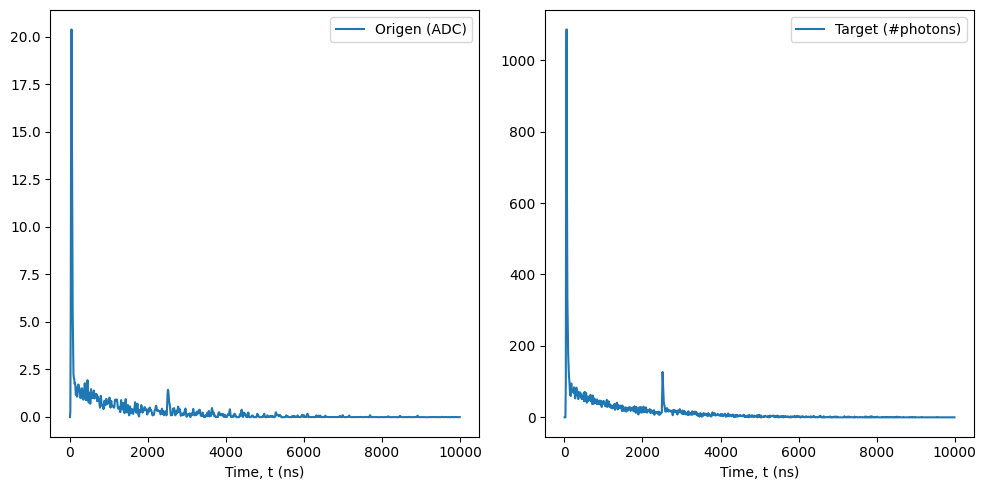

In [13]:
i=3
v = [signals_dec_us.iloc[i,:], signals_id.iloc[i,:]]
plotSignals(t_id, v, ['Origen (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

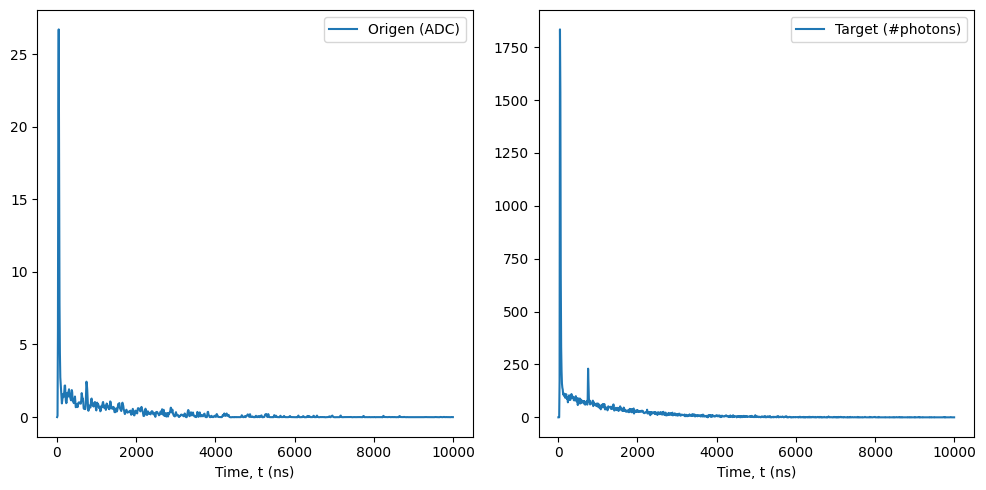

In [10]:
i=8
v = [signals_dec_us.iloc[i,:], signals_id.iloc[i,:]]
plotSignals(t_id[:], v, ['Origen (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

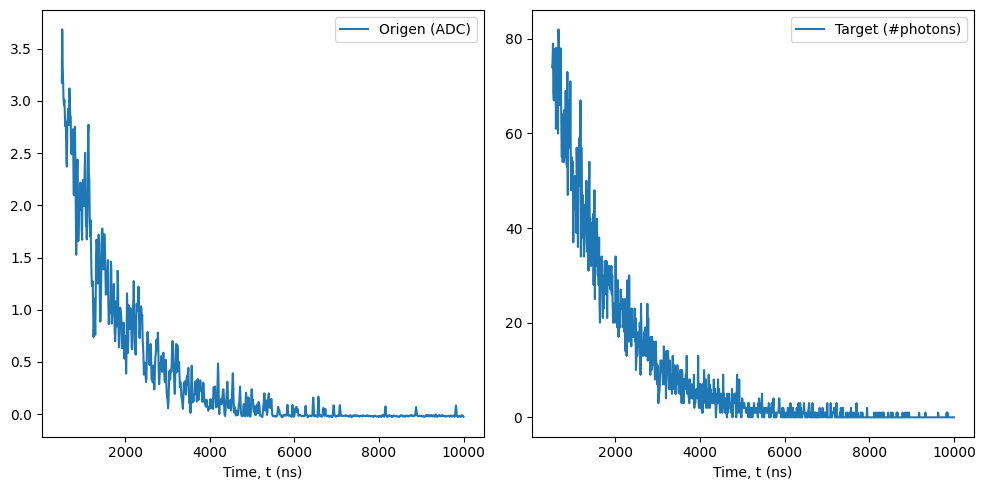

In [11]:
i=9
v = [signals_dec_us.iloc[i,t_idx1], signals_id.iloc[i,t_idx1]]
plotSignals(t_id[t_idx1], v, ['Origen (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

# Processing data

## Filtering data by electron peak

It is important to notice some series have a very low electron signal, what 
means that they cannot be extracted from the total one.  
With this in mind, we will use the greedy decomposition to extract the electron 
signal from and take only those signals whose electron is power enough to be 
extractable.

The next figure is an example where the electron could be extractable:

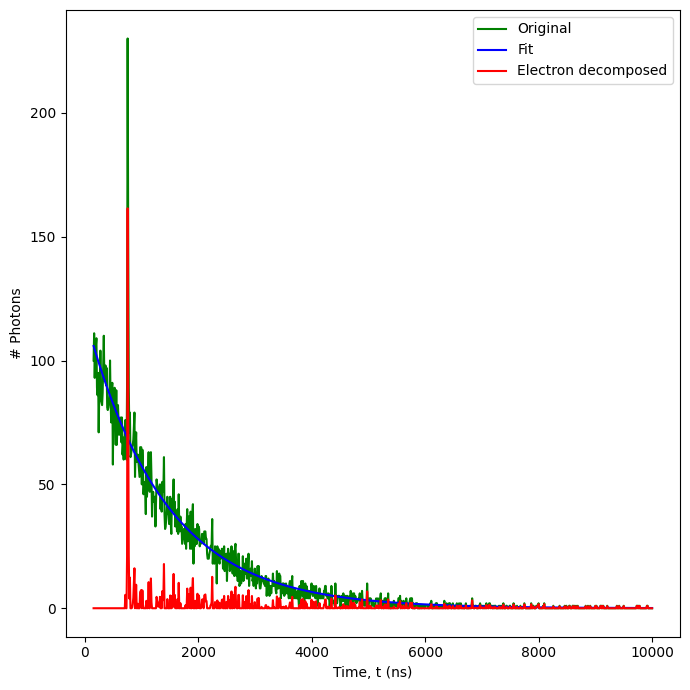

In [12]:
x = signals_id.iloc[8,t_idx]
model = greedyDecomposition(t_id[t_idx], x)
model.automaticFit()
model.extractElectronSignal()
model.plotSignals()

Meanwhile, in the next figure we see an electron without enough intensity. We 
would remove it from the study.

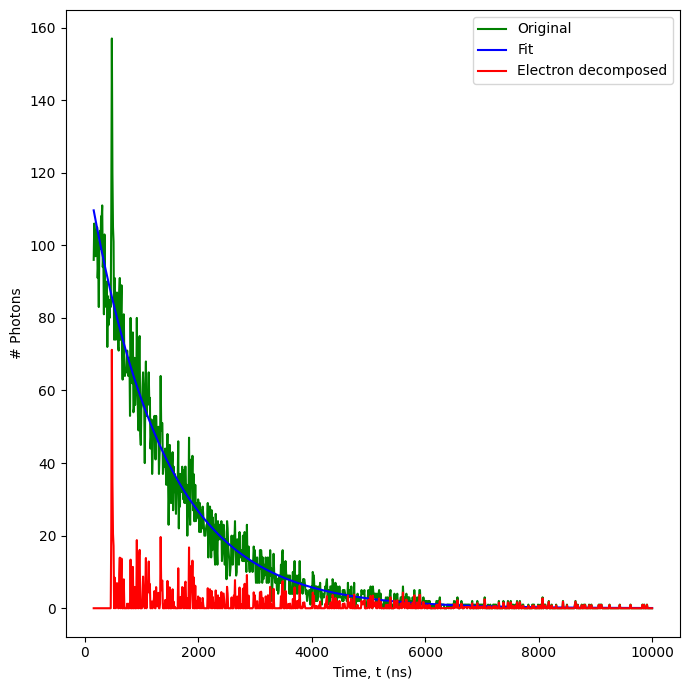

In [13]:
x = signals_id.iloc[25,t_idx]
model = greedyDecomposition(t_id[t_idx], x)
model.automaticFit()
model.extractElectronSignal()
model.plotSignals()

We set a `min_peak` of at least `50` photons of the extracted electron to let the 
serie continue:

In [14]:
m0 = time()

signals_idx = []
min_peak=50
min_t = 500
for idx in signals_id.index:
    x = signals_id.loc[idx, t_idx]
    
    model = greedyDecomposition(t_id[t_idx], x)
    model.automaticFit()
    model.extractElectronSignal()
    
    x_e = np.array(model.decomp_signal).reshape(-1)
    maxarg = np.argmax(x_e)
    if (x_e[maxarg] > min_peak) and (t_id[maxarg] > min_t):
        signals_idx.append(idx)
        
signals_id = signals_id.loc[signals_idx,:]
signals_dec_us =signals_dec_us.loc[signals_idx,:]
print('Time spent filtering: ', time()-m0, '(s)')

/Users/javigamero/MyMac/DS_Master/TFM/scripts/python/decompose.py:39: RuntimeWarning: overflow encountered in exp
  return A0 * np.exp(-t/tau)
/Users/javigamero/MyMac/DS_Master/TFM/scripts/python/decompose.py:39: RuntimeWarning: overflow encountered in multiply
  return A0 * np.exp(-t/tau)


Time spent filtering:  3.817239999771118 (s)


In [15]:
len(signals_idx)

4937

## Train and test

In [16]:
from sklearn.model_selection import train_test_split
t_id = t_id[:]
X = np.array(signals_dec_us.iloc[:,:].values)
y = np.array(signals_id.iloc[:,:].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=2023)

X_train = X_train[:, :, np.newaxis].astype('float64')
y_train = y_train.astype('float64')

X_test = X_test[:,:, np.newaxis].astype('float64')
y_test = y_test.astype('float64')

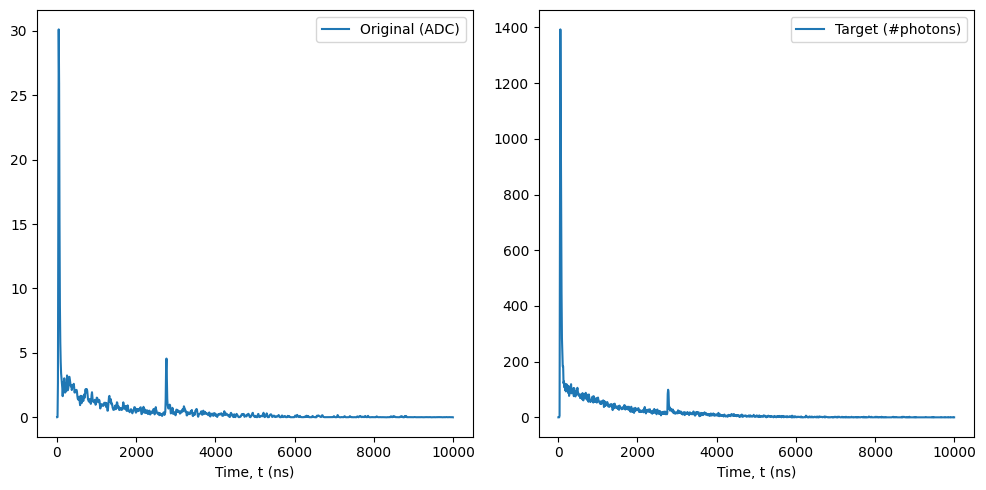

In [17]:
i=21
v = [X_train[i,:,0], y_train[i,:]]
plotSignals(t_id, v, ['Original (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3455, 1000, 1)
(3455, 1000)
(1482, 1000, 1)
(1482, 1000)


In [19]:
timesteps = int(X_train.shape[1])
features = int(X_train.shape[2])
input_shape = (timesteps,features)

print(input_shape)

(1000, 1)


# Deep learning models

## Models

In [20]:
def testModel(model, history, t, X_test, y_test, plot=True, i=5):

    if history!=None: 
        NN_trainPlot(history)

    y_pred = model.predict(X_test) 
    y_pred = y_pred[:,:,0] # adjust to (n_samples, n_timesteps)

    if plot:
        i=i
        v = [X_test[i,:,0], y_test[i,:], np.array(y_pred[i,:])]
        plotSignals(t, v, ['X_test', 'y_test', 'y_pred'], sep='True', figsize=(15,5))

    # e_found = 0
    # for GT, pred in zip(y_test, y_pred): 
    #     q = quality(t, GT, pred)
    #     if q.isElectronExctracted(): e_found+=1

    # print('Ratio e total found: {0}%'.format(e_found / y_test.shape[0] * 100))

### Model: simple LSTM (bidirectional)

In [21]:
from keras import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras.utils import set_random_seed

def model_SimpleBidirectional(n_hidden_layers=1, n_neurons=[16], 
                              activation=['tanh'], timesteps=985, features=1, 
                              seed=2023):

    set_random_seed(seed)
    
    init = True
    input_shape=(timesteps, features)

    model = Sequential()
    for i in range(n_hidden_layers): 
        if init: 
            # also adds the input layer
            model.add(Bidirectional(LSTM(units = n_neurons[i], 
                                         activation = activation[i], 
                                         return_sequences=True,
                                         input_shape = input_shape
                                         ))) 
            init=False
            
        else: 
            model.add(Bidirectional(LSTM(units = n_neurons[i], 
                                         activation = activation[i], 
                                         return_sequences=True)))
    
    model.add(Dense(1, activation='linear')) # output layer
    
    return model

Epoch 1/10
92/92 [==============================] - 19s 192ms/step - loss: 5164.2368 - val_loss: 4894.3232
Epoch 2/10
92/92 [==============================] - 17s 185ms/step - loss: 4800.8901 - val_loss: 4714.1025
Epoch 3/10
92/92 [==============================] - 17s 186ms/step - loss: 4679.8882 - val_loss: 4464.8286
Epoch 4/10
92/92 [==============================] - 17s 188ms/step - loss: 4459.6421 - val_loss: 4357.4736
Epoch 5/10
92/92 [==============================] - 17s 189ms/step - loss: 4339.8149 - val_loss: 4250.3936
Epoch 6/10
92/92 [==============================] - 18s 192ms/step - loss: 4239.0815 - val_loss: 4157.3037
Epoch 7/10
92/92 [==============================] - 17s 189ms/step - loss: 4153.0747 - val_loss: 4080.5396
Epoch 8/10
92/92 [==============================] - 17s 190ms/step - loss: 4080.4343 - val_loss: 4009.7231
Epoch 9/10
92/92 [==============================] - 17s 188ms/step - loss: 4011.1914 - val_loss: 3948.7051
Epoch 10/10
92/92 [==================

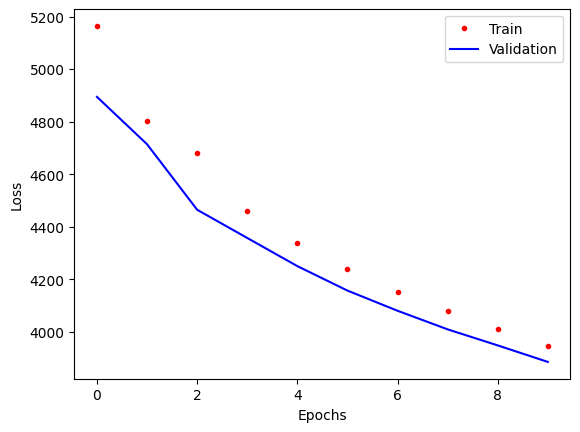

47/47 [==============================] - 2s 45ms/step


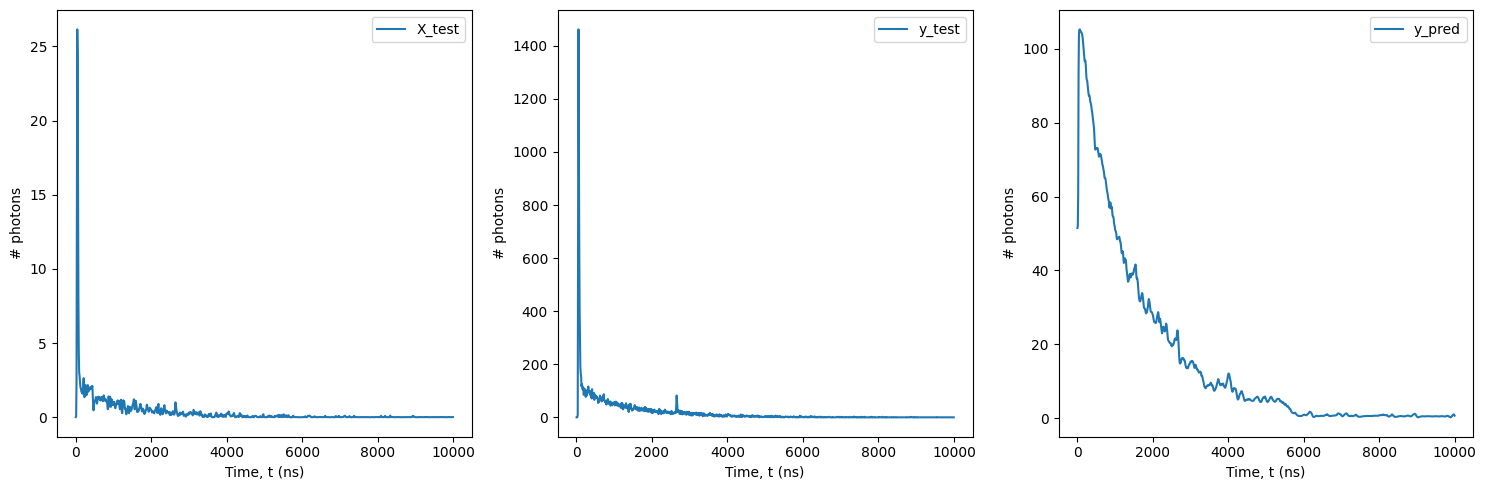

In [22]:
model = model_SimpleBidirectional(n_hidden_layers=1, 
                                  n_neurons=[64], 
                                  activation=['tanh'], 
                                  timesteps=timesteps, 
                                  features=features)

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=32, epochs=10, 
                    validation_split=0.15)

testModel(model, history, t_id, X_test, y_test, i=24)

47/47 [==============================] - 2s 44ms/step


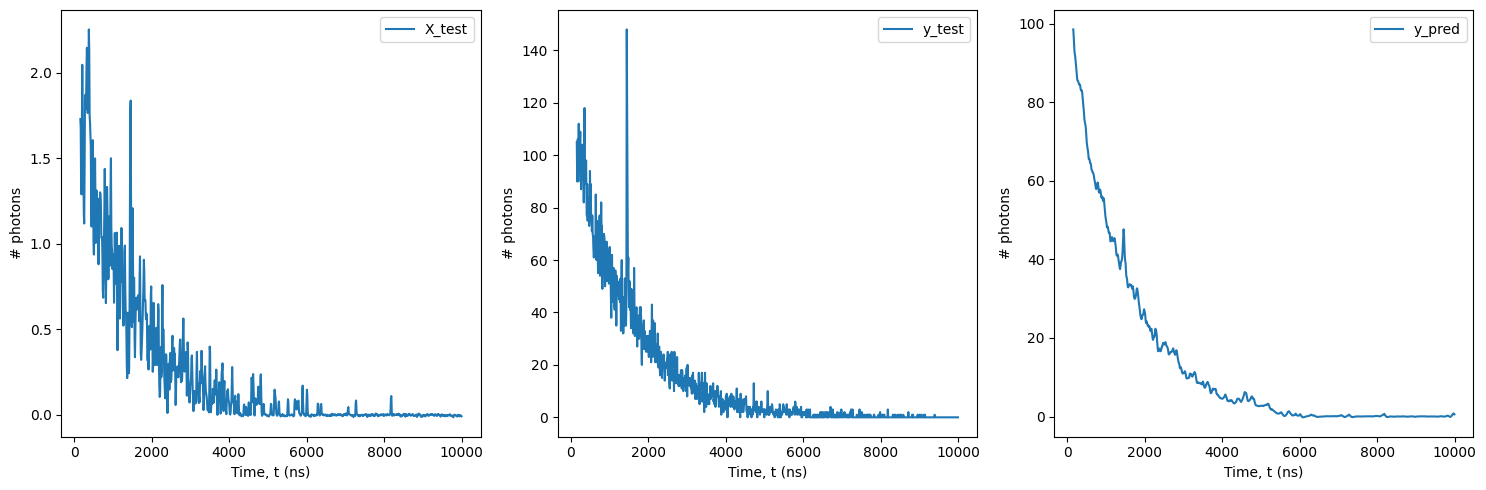

In [25]:
y_pred = model.predict(X_test) 
v = [X_test[i,t_idx,0], y_test[i,t_idx], np.array(y_pred[i,t_idx])]
plotSignals(t_id[t_idx], v, ['X_test', 'y_test', 'y_pred'], sep='True', figsize=(15,5))

### Model: complex LSTM (bidirectional)

In [16]:
from keras import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping

def LSTMBidirectional(n_hidden_layers=2, n_neurons=[16,16], 
                      activation=['tanh', 'tanh'], timesteps=985, features=1, 
                      seed=2023):

    set_random_seed(seed)
    
    init = True
    input_shape=(timesteps, features)

    model = Sequential()
    for i in range(n_hidden_layers): 
        if init: 
            # also adds the input layer
            model.add(Bidirectional(LSTM(units = n_neurons[i], 
                                         activation = activation[i], 
                                         return_sequences=True,
                                         input_shape = input_shape
                                         ))) 
            init=False
            
        else: 
            model.add(Bidirectional(LSTM(units = n_neurons[i], 
                                         activation = activation[i], 
                                         return_sequences=True)))
    
    model.add(Dense(1, activation='linear')) # output layer
    
    return model

In [17]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True, 
                         mode='auto')

model = LSTMBidirectional(n_hidden_layers=2, 
                                  n_neurons=[64, 64], 
                                  activation=['tanh', 'tanh'], 
                                  timesteps=timesteps, 
                                  features=features)

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=32, epochs=10, 
                    validation_split=0.3, callbacks=callback)

testModel(model, history, t_id, X_test, y_test, i=24)

Epoch 1/10
143/143 [==============================] - 126s 861ms/step - loss: 395.2179 - val_loss: 263.8266
Epoch 2/10
 10/143 [=>............................] - ETA: 1:36 - loss: 279.8279

KeyboardInterrupt: 

In [14]:
MODELS = os.path.join(PATH, os.path.join('scripts', os.path.join('python', 'models')))
model.save(os.path.join(MODELS, 'conversion_2bidirLSTM.keras'), overwrite=True, 
           save_format='tf')

Epoch 1/10
143/143 [==============================] - 230s 2s/step - loss: 1.4012 - val_loss: 0.7485
Epoch 2/10
143/143 [==============================] - 203s 1s/step - loss: 0.6355 - val_loss: 0.5170
Epoch 3/10
143/143 [==============================] - 208s 1s/step - loss: 0.5053 - val_loss: 0.4433
Epoch 4/10
143/143 [==============================] - 213s 1s/step - loss: 0.4226 - val_loss: 0.3881
Epoch 5/10
143/143 [==============================] - 212s 1s/step - loss: 0.3767 - val_loss: 0.3769
Epoch 6/10
143/143 [==============================] - 201s 1s/step - loss: 0.3426 - val_loss: 0.3215
Epoch 7/10
143/143 [==============================] - 198s 1s/step - loss: 0.2985 - val_loss: 0.2775
Epoch 8/10
143/143 [==============================] - 202s 1s/step - loss: 0.2800 - val_loss: 0.2819
Epoch 9/10
143/143 [==============================] - 217s 2s/step - loss: 0.2680 - val_loss: 0.2488
Epoch 10/10
143/143 [==============================] - 205s 1s/step - loss: 0.2514 - val_lo

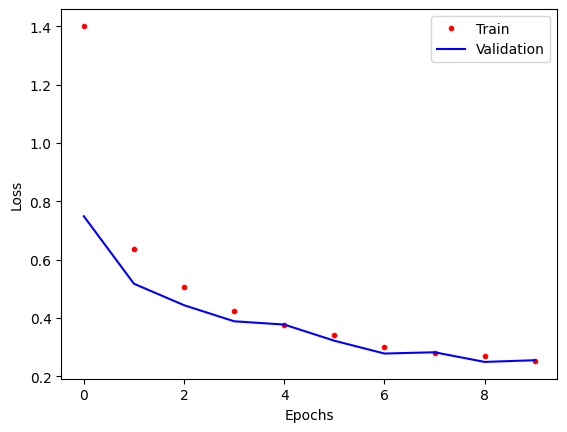

88/88 [==============================] - 28s 303ms/step


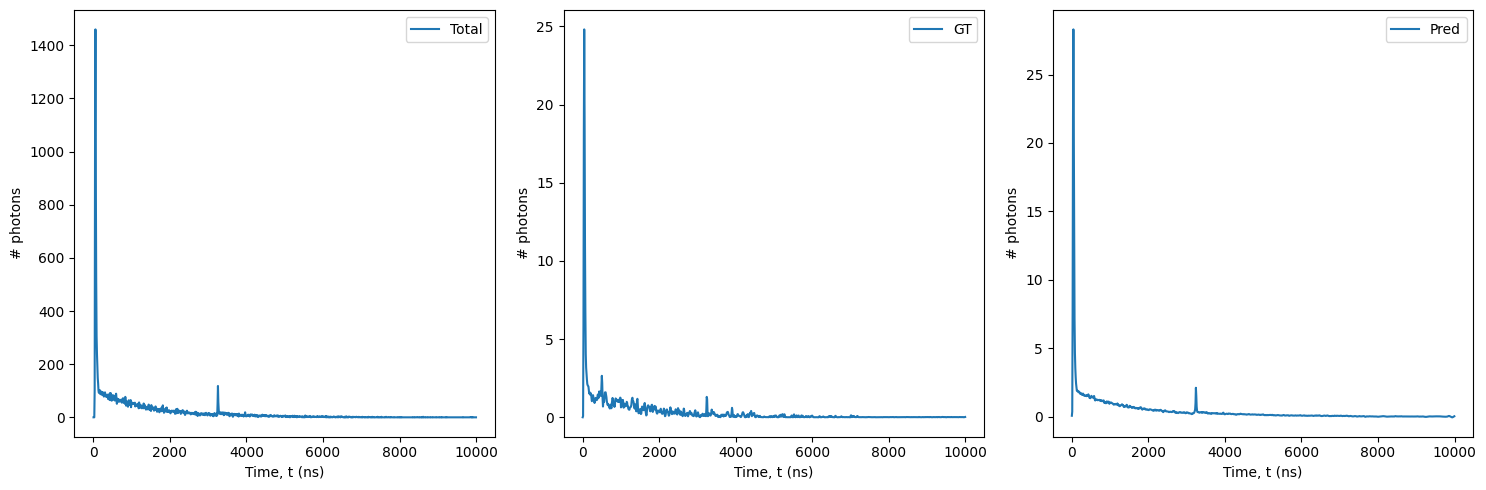

In [15]:
callback = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True, 
                         mode='auto')

model = LSTMBidirectional(n_hidden_layers=3, 
                                  n_neurons=[64, 64, 64], 
                                  activation=['tanh', 'tanh', 'tanh'], 
                                  timesteps=timesteps, 
                                  features=features)

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=32, epochs=10, 
                    validation_split=0.3, callbacks=callback)

testModel(model, history, t_id, X_test, y_test, i=24)

In [16]:
MODELS = os.path.join(PATH, os.path.join('scripts', os.path.join('python', 'models')))
model.save(os.path.join(MODELS, 'conversion_3bidirLSTM.keras'), overwrite=True, 
           save_format='tf')

<center>

|Model                              |epochs       |MSE
|:---------------------------------:|:-----------:|---------|
|[64,64]/[tanh,tanh]/adam           |10           |0.28
|[64,64,64]/[tanh,tanh,tanh]/adam   |10           |0.24

## Results comparison

<center>

|Model                              |epochs       |MSE
|:---------------------------------:|:-----------:|---------|
|64/sigmoid/adam    |10           |0.56
|64/tanh/adam       |10           |0.42
|64/tanh/RMSprop    |10           |0.50
|64/tanh/SGD        |10           |>1
|64/tanh/adam       |28           |0.30
|[64,64]/[tanh,tanh]/adam           |10           |0.28
|[64,64,64]/[tanh,tanh,tanh]/adam   |10           |0.24